# 0. Install and Import Dependencies

In [1]:
!pip install neuralprophet

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 748.8MB 13kB/s 
     |████████████████████████████████| 81kB 3.7MB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [52]:
# https://www.kaggle.com/cornflake15/denpasarbalihistoricalweatherdata

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

# 1. Read in Data and Process Dates

In [35]:
df = pd.read_csv('denpasar1.csv')
df.head()

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,1.71,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


In [37]:
df['dt_iso'] = pd.to_datetime(df['dt_iso'])

In [38]:
df.columns

Index(['dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'rain_6h', 'rain_12h', 'rain_24h', 'rain_today', 'snow_1h',
       'snow_3h', 'snow_6h', 'snow_12h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [40]:
df.head()

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1990-01-01 00:00:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1990-01-01 01:00:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1990-01-01 02:00:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1990-01-01 03:00:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1990-01-01 04:00:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,1.71,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


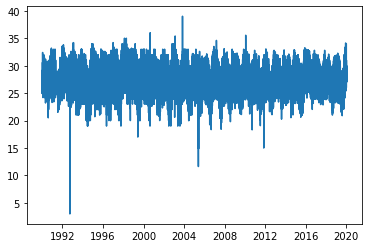

In [47]:
plt.plot(df['dt_iso'], df['temp'])

In [41]:
data = df[['dt_iso', 'temp']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
0,1990-01-01 00:00:00,25.82
1,1990-01-01 01:00:00,26.20
2,1990-01-01 02:00:00,26.45
3,1990-01-01 03:00:00,26.80
4,1990-01-01 04:00:00,27.04


# 2. Train Model

In [42]:
m = NeuralProphet()

In [43]:
model = m.fit(data, freq='H', epochs=1000)

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 128


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [2:28:53<00:00,  8.93s/it, SmoothL1Loss=0.000726, MAE=0.991, RegLoss=0]


# 3. Forecast Away

In [48]:
future = m.make_future_dataframe(data, periods=45000)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2020-01-08 00:00:00,None,27.361073,NaN,27.661610,0.345916,0.005119,-0.651573
1,2020-01-08 01:00:00,None,28.303825,NaN,27.661612,0.345746,0.005976,0.290490
2,2020-01-08 02:00:00,None,29.105585,NaN,27.661615,0.345577,0.006864,1.091529
3,2020-01-08 03:00:00,None,29.554625,NaN,27.661617,0.345408,0.007775,1.539823
4,2020-01-08 04:00:00,None,29.806837,NaN,27.661621,0.345240,0.008704,1.791272


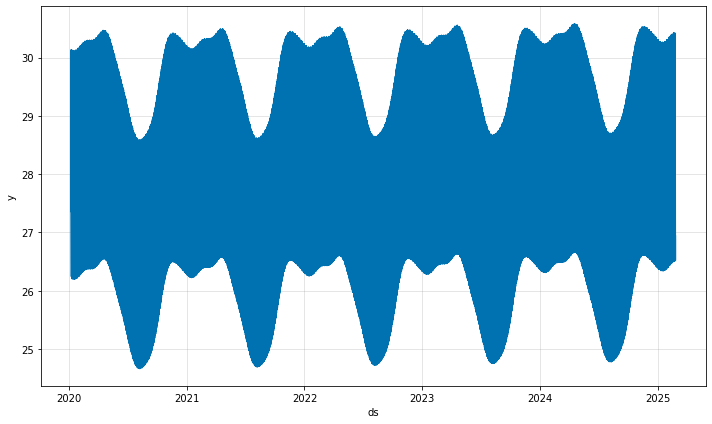

In [49]:
plot1 = m.plot(forecast)

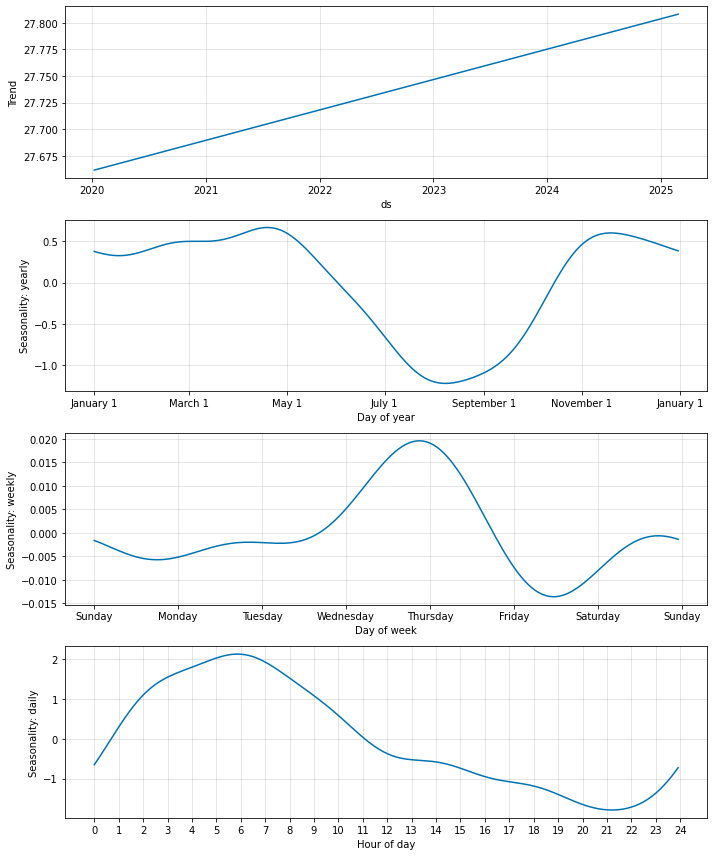

In [50]:
plt2 = m.plot_components(forecast)

# 4. Save Model

In [51]:
with open('den_model.pkl', "wb") as f:
    pickle.dump(m, f)